# Explore Sex Hormones During Pregnancy

This notebook loads and visualizes the hormone levels available in the file `/home/data/pregnancy/28Baby_Hormones.csv`.

In [1]:
import src.setcwd

src.setcwd.main()

Working directory:  /home/nmiolane/code/my28brains/src
Directory added to path:  /home/nmiolane/code/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/src
Directory added to path:  /home/nmiolane/code/my28brains/H2_SurfaceMatch
Directory added to path:  /home/nmiolane/code/my28brains/src/notebooks
Directory added to path:  /home/nmiolane/code/my28brains/src/notebooks/csv


In [2]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np

os.environ["GEOMSTATS_BACKEND"] = "pytorch"  # noqa: E402
import geomstats.backend as gs

import project_pregnancy.default_config as default_config
import src.datasets.utils as data_utils

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
(
    space,
    mesh_sequence_vertices,
    vertex_colors,
    hormones_df,
) = data_utils.load_real_data(default_config)

n_vertices = len(mesh_sequence_vertices[0])
n_meshes_in_sequence = len(mesh_sequence_vertices)
faces = gs.array(space.faces).numpy()

<module 'project_pregnancy.default_config' from '/home/nmiolane/code/my28brains/project_pregnancy/default_config.py'>
Using mesh data from (unsorted) reparameterized directory

Found 25 .plys for (left, -1) in /home/nmiolane/code/my28brains/project_pregnancy/results/1_preprocess/d_reparameterized
Day 15 has no data. Skipping.
DayID not to use: 15
Hormones excluded from day:  15
df index:  RangeIndex(start=0, stop=25, step=1)
Missing days: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 22, 23, 24], dtype='int64')
space faces: torch.Size([2182, 3])
mesh_sequence_vertices shape: torch.Size([13, 945, 3])
hormones_df shape: (13, 9)


In [4]:
hormones_df

,sessionID,estro,prog,lh,gestWeek,stage,EndoStatus,trimester,dayID
9,ses-10,4700.00,53.900,1.45,15.0,preg,Pregnant,second,10
10,ses-11,4100.00,56.800,0.87,17.0,preg,Pregnant,second,11
11,ses-12,6190.00,70.600,0.93,19.0,preg,Pregnant,second,12
12,ses-13,9640.00,54.700,0.62,22.0,preg,Pregnant,second,13
13,ses-14,8800.00,64.100,0.73,24.0,preg,Pregnant,second,14
14,ses-16,10200.00,74.200,0.69,29.0,preg,Pregnant,third,16
15,ses-17,9920.00,83.000,0.77,31.0,preg,Pregnant,third,17
16,ses-18,9860.00,95.300,0.83,33.0,preg,Pregnant,third,18
17,ses-19,12400.00,103.000,0.59,36.0,preg,Pregnant,third,19
18,ses-20,9.18,0.120,0.96,43.0,post,Postpartum,post,20


In [7]:
print(type(hormones_df[["estro", "prog", "lh"]].values))
hormones_df[["estro", "prog", "lh"]].values.shape

<class 'numpy.ndarray'>


(13, 3)

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_hormones(df):
    fig = make_subplots(rows=1, cols=3,
                        subplot_titles=('Estrogen Levels', 'Progesterone Levels', 'LH Levels'))
    
    fig.add_trace(go.Scatter(x=df['gestWeek'], y=df['estro'], name='Estrogen', mode='lines+markers'), row=1, col=1)
    fig.update_yaxes(title_text='pg/ml', row=1, col=1)
    
    fig.add_trace(go.Scatter(x=df['gestWeek'], y=df['prog'], name='Progesterone', mode='lines+markers'), row=1, col=2)
    fig.update_yaxes(title_text='ng/ml', row=1, col=2)

    fig.add_trace(go.Scatter(x=df['gestWeek'], y=df['lh'], name='LH', mode='lines+markers'), row=1, col=3)
    fig.update_yaxes(title_text='ng/ml', row=1, col=3)
    
    fig.update_layout(height=300, width=900, showlegend=False)
    fig.show()

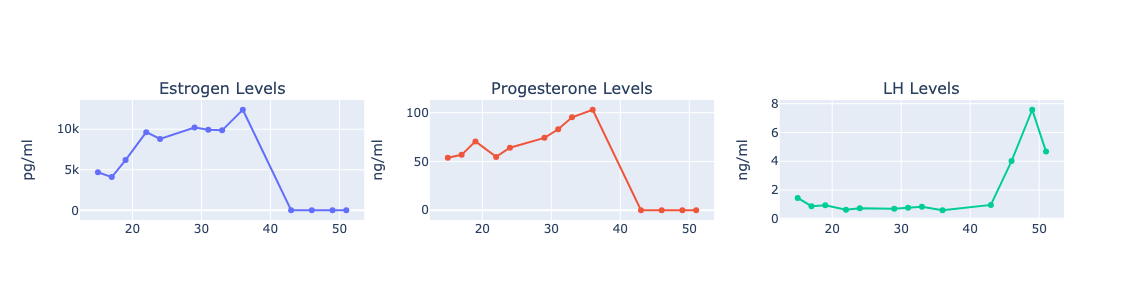

In [33]:
plot_hormones(hormones_df)

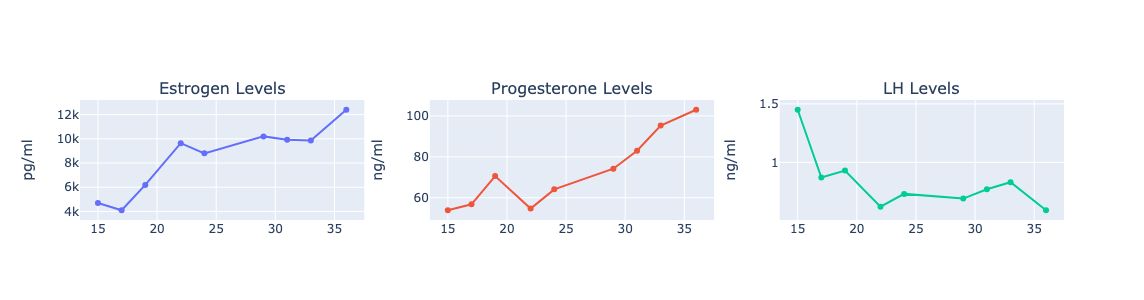

In [34]:
plot_hormones(hormones_df[hormones_df["EndoStatus"] == "Pregnant"])

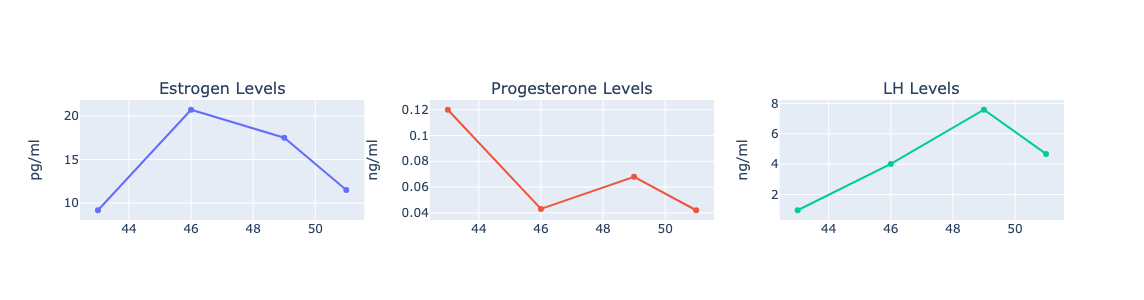

In [35]:
plot_hormones(hormones_df[hormones_df["EndoStatus"] == "Postpartum"])

In [44]:
def plot_hormones_hist(df):
    fig = make_subplots(rows=1, cols=3,
                        subplot_titles=('Estrogen Levels', 'Progesterone Levels', 'LH Levels'))
    
    fig.add_trace(go.Histogram(x=df['estro'], name='Estrogen', marker_color='blue', nbinsx=10), row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)  # Update y-axis to 'Count' for histogram
    
    fig.add_trace(go.Histogram(x=df['prog'], name='Progesterone', marker_color='red', nbinsx=10), row=1, col=2)
    fig.update_yaxes(title_text='Count', row=1, col=2)
    
    fig.add_trace(go.Histogram(x=df['lh'], name='LH', marker_color='green', nbinsx=10), row=1, col=3)
    fig.update_yaxes(title_text='Count', row=1, col=3)
    
    fig.update_layout(
        height=300, 
        width=900, 
        showlegend=False,
    )
    fig.show()

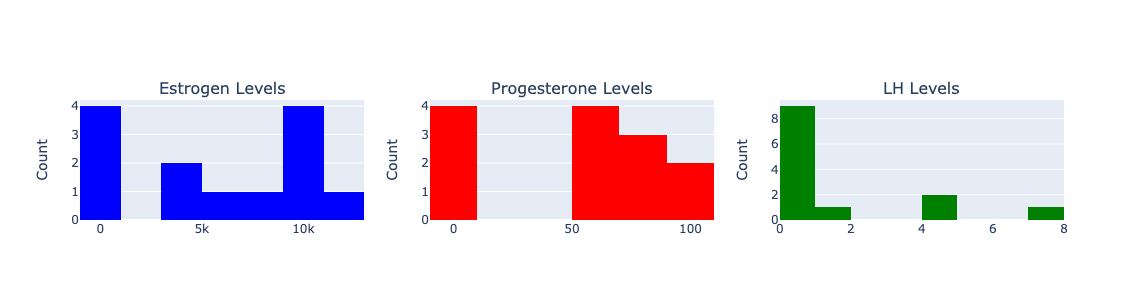

In [45]:
plot_hormones_hist(hormones_df)

This motivates us to remove the postpartum phase for the regression. We extract min and max values of each hormone for the pregnant phase only.

In [46]:
def print_min_max(hormone):
    print(f"Min: {min(hormone.values)}; Max: {max(hormone.values)}")

In [51]:
for hormone_name in ["estro", "prog", "lh"]:
    print(hormone_name)
    print_min_max(hormones_df[hormone_name])

estro
Min: 9.18; Max: 12400.0
prog
Min: 0.042; Max: 103.0
lh
Min: 0.59; Max: 7.58


In [52]:
for hormone_name in ["estro", "prog", "lh"]:
    print(hormone_name)
    print_min_max(hormones_df[hormones_df["EndoStatus"] == "Pregnant"][hormone_name])

estro
Min: 4100.0; Max: 12400.0
prog
Min: 53.9; Max: 103.0
lh
Min: 0.59; Max: 1.45
